<a href="https://colab.research.google.com/github/crystalclcm/JobPostings/blob/main/job_postings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
#Load datasets
recent_df = pd.read_csv('/content/recent_job_postings.csv')
skills_df = pd.read_csv('/content/historical_job_skills.csv')
postings_df = pd.read_csv('/content/historical_job_postings.csv')
companies_df = pd.read_csv('/content/historical_companies.csv')

In [9]:
# Convert all column names to lowercase and replace spaces with underscores.
# This makes it easier to work with the data consistently in Python.

for df in [recent_df, skills_df, postings_df, companies_df]:
    df.columns = df.columns.str.lower().str.replace(' ', '_')


In [10]:
#Removing duplicate rows from all datasets (recent jobs, historical jobs, skills, and companies)
for df in [recent_df, skills_df, postings_df, companies_df]:
    df.drop_duplicates(inplace=True)


In [11]:
#Merges historical job postings (postings_df) with company details (companies_df) using company_id.
historical_df = postings_df.merge(companies_df, on='company_id', how='left')

In [12]:
#Adds a period column to both datasets so you can later combine them and distinguish historical vs recent.
historical_df['period'] = 'historical'
recent_df['period'] = 'recent'

In [13]:
#Then we combine both datasets into one DataFrame for easier analysis.
combined_df = pd.concat([historical_df, recent_df], ignore_index=True)

In [14]:
if 'date_posted' in combined_df.columns:
    combined_df['date_posted'] = pd.to_datetime(combined_df['date_posted'], errors='coerce')


# Visualisations

# Job Postings by Period
This gives us a quick view of how the job market size has changed over time

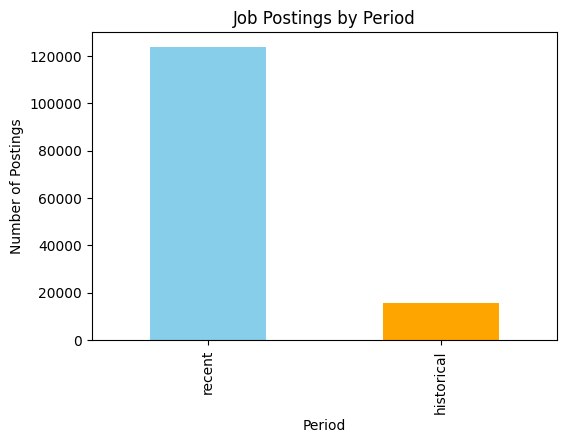

In [15]:
plt.figure(figsize=(6,4))
combined_df['period'].value_counts().plot(kind='bar', color=['skyblue','orange'])
plt.title('Job Postings by Period')
plt.xlabel('Period')
plt.ylabel('Number of Postings')
plt.show()


# Top 10 job titles
- Plot the most common job titles across all postings.
 - This helps us see which roles dominate the job market.
 - Most top titles are non-AI roles, which is important for interpretation.


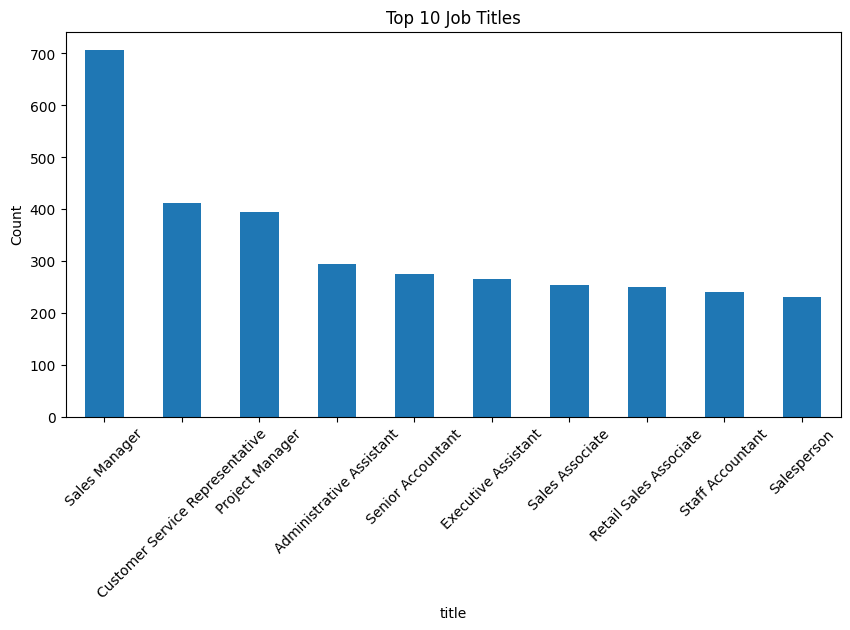

In [16]:
plt.figure(figsize=(10,5))
combined_df['title'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Job Titles')
plt.xlabel('title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [17]:
ai_keywords = ['ai', 'artificial intelligence', 'machine learning', 'ml', 'deep learning', 'dl', 'data science']

# Flag AI-related skills
skills_df['is_ai_skill'] = skills_df['skill_abr'].str.lower().apply(lambda x: any(k in x for k in ai_keywords))

# Count top AI skills
ai_skills = skills_df[skills_df['is_ai_skill']]['skill_abr'].value_counts().head(10)

# Check if we have data before plotting
if not ai_skills.empty:
    plt.figure(figsize=(10,5))
    ai_skills.plot(kind='bar', color='green')
    plt.title('Top AI-Related Skills')
    plt.xlabel('Skill')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No AI-related skills found. Check ai_keywords or column values.")

No AI-related skills found. Check ai_keywords or column values.


In [18]:
print(skills_df['skill_abr'].unique()[:50])

['ACCT' 'FIN' 'MGMT' 'MNFC' 'HCPR' 'ENG' 'IT' 'ADM' 'SALE' 'DSGN' 'ART'
 'EDU' 'TRNG' 'BD' 'PRJM' 'CNSL' 'STRA' 'OTHR' 'RSCH' 'GENB' 'MRKT' 'LGL'
 'CUST' 'QA' 'PROD' 'ANLS' 'PR' 'WRT' 'SUPL' 'HR' 'PRDM' 'ADVR' 'PRCH'
 'DIST' 'SCI']


# AI related skills analysis
 - Use the historical skills dataset to identify AI-related skills.
 - We define a list of abbreviations (IT, ENG, ANLS, RSCH, SCI) as AI-related.
 - Then we count and plot the most frequent AI-related skills.
 - This shows which technical skills were most in demand historically.


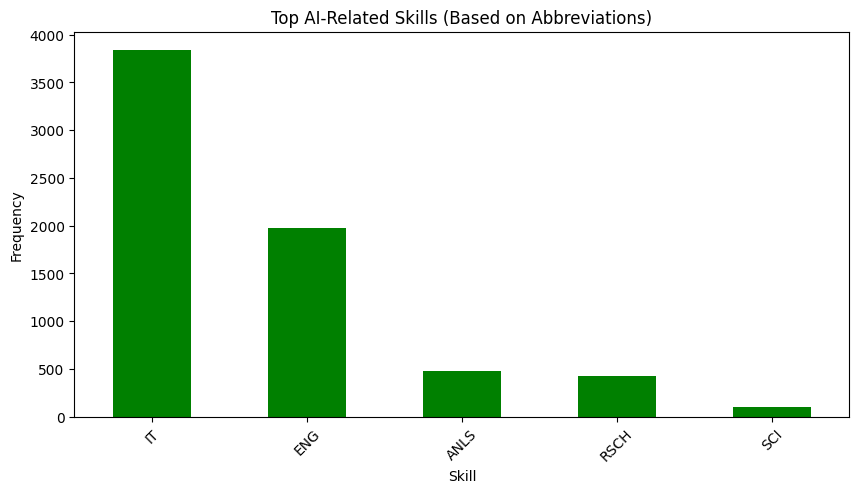

In [19]:
# Define AI-related skill abbreviations based on your dataset
ai_skill_codes = ['IT', 'SCI', 'ANLS', 'RSCH', 'ENG']
#IT = Information Technology
#ENG = Engineering
#ANLS = Analytics
#RSCH = Research
#SCI = Science

# Flag AI-related skills
skills_df['is_ai_skill'] = skills_df['skill_abr'].isin(ai_skill_codes)

# Count top AI-related skills
ai_skills = skills_df[skills_df['is_ai_skill']]['skill_abr'].value_counts().head(10)

# Plot if data exists
if not ai_skills.empty:
    plt.figure(figsize=(10,5))
    ai_skills.plot(kind='bar', color='green')
    plt.title('Top AI-Related Skills (Based on Abbreviations)')
    plt.xlabel('Skill')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("No AI-related skills found. Check ai_skill_codes list.")

# AI job postings by period + percentage
- Filter job titles that contain AI-related keywords (e.g., 'machine learning', 'data science').
-  Count how many AI-related jobs exist in each period.
- Calculate the percentage of AI jobs compared to total jobs for each period.
 - Plot a bar chart to visualize AI job growth.
- This is important because it normalizes for dataset size differences.


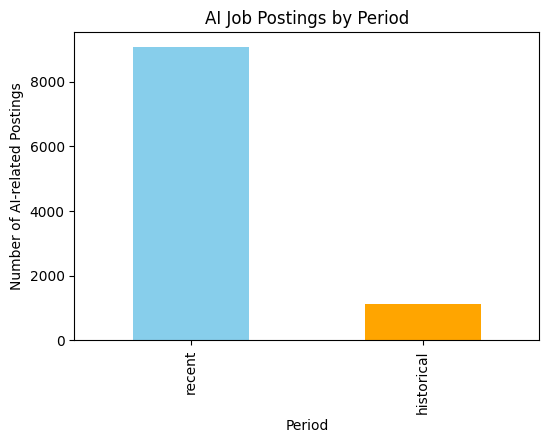

In [20]:
#Trend of AI job postings by period (historical vs recent)
ai_keywords = ['ai', 'artificial intelligence', 'machine learning', 'ml', 'deep learning', 'data science', 'analytics']

# Filter AI-related jobs based on title
ai_jobs = combined_df[combined_df['title'].str.lower().apply(lambda x: any(k in x for k in ai_keywords))]

# Plot by period
if not ai_jobs.empty:
    plt.figure(figsize=(6,4))
    ai_jobs['period'].value_counts().plot(kind='bar', color=['skyblue','orange'])
    plt.title('AI Job Postings by Period')
    plt.xlabel('Period')
    plt.ylabel('Number of AI-related Postings')
    plt.show()
else:
    print("No AI-related job titles found. Consider expanding ai_keywords or using industry mapping.")

AI Jobs Percentage by Period:
period
recent        7.33
historical    7.00
Name: count, dtype: float64


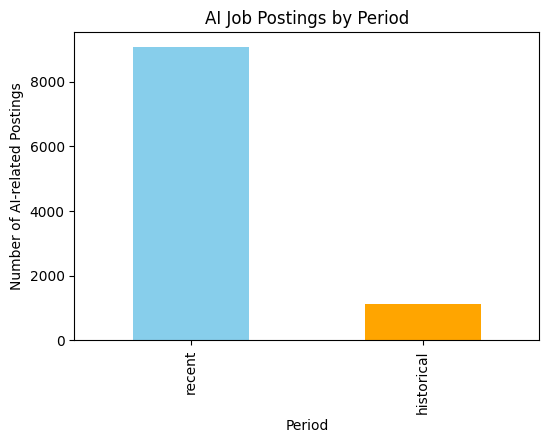

In [22]:

# Calculate counts and percentage
period_counts = combined_df['period'].value_counts()
ai_period_counts = ai_jobs['period'].value_counts()
ai_percentage = (ai_period_counts / period_counts * 100).round(2)

print("AI Jobs Percentage by Period:")
print(ai_percentage)

plt.figure(figsize=(6,4))
ai_period_counts.plot(kind='bar', color=['skyblue','orange'])
plt.title('AI Job Postings by Period')
plt.xlabel('Period')
plt.ylabel('Number of AI-related Postings')
plt.show()


# Interpretations


- Recent postings far exceed historical postings, indicating rapid market expansion.
- This growth means universities must keep curricula updated to match evolving skill needs.
- Most top titles are non-AI roles (e.g., Sales Manager, Customer Service).
- IT and Engineering dominate AI-related skills historically.
- Analytics and research appear but at lower frequencies.
- Suggests strong technical requirements for AI roles, but also highlights gaps in soft skills or ethics-related competencies.
- AI-related job postings increased dramatically in numbers (from 1,000 to 9,000).
- However, their share of total postings only rose slightly (7% → 7.33%).
- This suggests overall job growth was much larger than AI-specific growth.
- AI readiness should be integrated across all disciplines, not limited to tech programs.



# limitations

- The recent dataset is much bigger than the historical one, so the raw numbers look very different.
- Older data may not show all AI jobs because fewer sources were available back then.
- We only compare two time periods, not year by year, so we can’t see exactly when AI jobs started growing fast.
- AI jobs were found using keywords and skill codes, so some roles might be missed.
- Percentages help make the comparison fairer, but results should be seen as general trends, not exact figures.
